In [ ]:
# prompt: AttributeError: partially initialized module 'nltk' has no attribute 'internals' (most likely due to a circular import)

!pip install nltk==3.7
import nltk
nltk.download('punkt')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()
%matplotlib inline
import string

AttributeError: partially initialized module 'nltk' has no attribute 'internals' (most likely due to a circular import)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/lyrics.csv").sample(frac=0.1,replace=False,random_state=101)


In [ ]:
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
import re
from nltk.corpus import stopwords
from tqdm import tqdm

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

df['Lyric'] = df['Lyric'].progress_apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop_words | punctuation)]))


100%|██████████| 68283/68283 [00:54<00:00, 1263.53it/s]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Define a function to create a progress bar
def tqdm_fit_transform(corpus):
    total = len(corpus)
    with tqdm(total=total, desc="Processing") as pbar:
        X = tfidf_vectorizer.fit_transform(corpus)
        pbar.update(total)
    return X

# Fit and transform the 'Lyric' column to convert text into numerical features with a progress bar
X = tqdm_fit_transform(df['Lyric'])

# 'genre' column will be your target variable
y = df['genre']


Processing: 100%|██████████| 68283/68283 [00:09<00:00, 7052.87it/s]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed to train your machine learning model using X_train and y_train,
# and evaluate its performance on X_test and y_test.


In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    criterion='gini',
    class_weight=None,
    oob_score=False,
    random_state=42,
    verbose=0
)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = rf_classifier.predict(X_test)


Accuracy: 0.7065973493446585


In [ ]:
# prompt: NameError: name 'f1_score' is not defined

from sklearn.metrics import f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred, average='micro')
# Print the F1 score
print("F1 Score:", f1)
from sklearn.metrics import recall_score

# Calculate the recall score
recall = recall_score(y_test, y_pred, average='macro')

# Print the recall score
print("Recall:", recall)
from sklearn.metrics import precision_score
# Calculate the precision score for each class
precision = precision_score(y_test, y_pred, average='macro')

# Print the precision score
print("Precision:", precision)



Accuracy: 0.7065973493446585
F1 Score: 0.7065973493446585
Recall: 0.6244223915574466
Precision: 0.6416481132574408


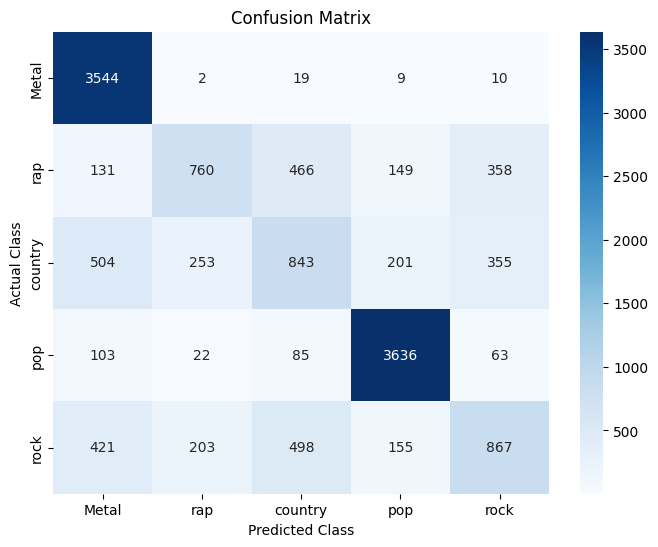

In [ ]:
# prompt: from sklearn.metrics import confusion_matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)   print a plot for this confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Get the class labels
class_labels = df['genre'].unique()

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Set the title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with original and predicted genre labels
results_df = pd.DataFrame({'Original Genre': y_test, 'Predicted Genre': y_pred})

# Display the DataFrame
print(results_df)


       Original Genre Predicted Genre
508527            pop             pop
494571            pop             pop
347023            rap             rap
451257        country            rock
522604            pop             pop
...               ...             ...
614066           rock            rock
328576            rap           Metal
163441          Metal           Metal
95836           Metal             rap
243877            rap             rap

[13657 rows x 2 columns]


In [ ]:


results_df['Predicted Genre'].value_counts()


Predicted Genre
Metal      4703
rap        4150
pop        1911
rock       1653
country    1240
Name: count, dtype: int64

In [ ]:


import pandas as pd
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression classifier
logistic_regressor = LogisticRegression()

# Fit the classifier on the training data
logistic_regressor.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_logistic = logistic_regressor.predict(X_test)

# Calculate the accuracy of the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

# Create a DataFrame with original and predicted genre labels
results_df_logistic = pd.DataFrame({'Original Genre': y_test, 'Predicted Genre': y_pred_logistic})

# Display the DataFrame
print(results_df_logistic)

results_df_logistic['Predicted Genre'].value_counts()


Logistic Regression Accuracy: 0.7525810939444973
       Original Genre Predicted Genre
508527            pop             pop
494571            pop            rock
347023            rap             rap
451257        country            rock
522604            pop         country
...               ...             ...
614066           rock            rock
328576            rap           Metal
163441          Metal           Metal
95836           Metal           Metal
243877            rap             rap

[13657 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted Genre
Metal      4089
rap        3868
pop        2200
rock       1844
country    1656
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

lr_precision = precision_score(y_test, y_pred_logistic, average='macro')
lr_recall = recall_score(y_test, y_pred_logistic, average='macro')
lr_f1 = f1_score(y_test, y_pred_logistic, average='macro')


print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)



Precision: 0.697677115156902
Recall: 0.6912455822164678
F1 Score: 0.6926274399183923


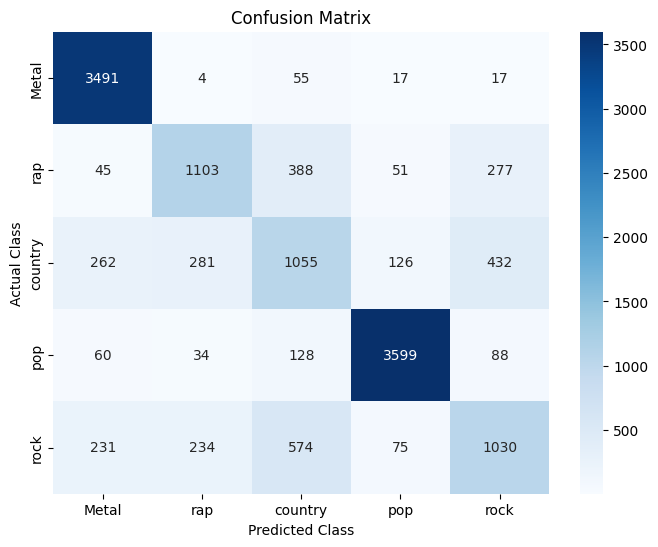

In [ ]:
class_labels = df['genre'].unique()
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Set the title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:


import pandas as pd
from xgboost import XGBClassifier
params =(
    'eta': 0.01,
    'n_estimators': 90,
    'max_depth': 10,
    'min_child_weight': 1,
    'reg_lambda': 2,
    'reg_alpha': 0.5,
    'gamma': 0.3,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'colsample_bylevel': 0.5,
    'colsample_bynode': 0.5,
    'tree_method': 'hist'
)

# Create the XGBoost classifier with specified parameters
xgb_classifier = xgb.XGBClassifier(random_state=42, **params)

# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train_encoded)

# Predict the labels for the testing set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Create a DataFrame with original and predicted genre labels
results_df_xgb = pd.DataFrame({'Original Genre': y_test, 'Predicted Genre': y_pred_xgb})

# Display the DataFrame
print(results_df_xgb)

results_df_xgb['Predicted Genre'].value_counts()


XGBoost Accuracy: 0.7537526543164678
       Original Genre  Predicted Genre
508527            pop                2
494571            pop                2
347023            rap                3
451257        country                4
522604            pop                1
...               ...              ...
614066           rock                4
328576            rap                0
163441          Metal                0
95836           Metal                0
243877            rap                3

[13657 rows x 2 columns]


Predicted Genre
0    4078
3    3834
2    2568
4    1777
1    1400
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)

# Calculate precision
precision = precision_score(y_test_encoded, y_pred_xgb, average='macro')

# Calculate recall
recall = recall_score(y_test_encoded, y_pred_xgb, average='macro')

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred_xgb, average='macro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7537526543164678
Precision: 0.7032962110106862
Recall: 0.6891340314741428
F1 Score: 0.6913535986493416
Confusion Matrix:
[[3514    2   48    0   20]
 [  65  941  491   44  323]
 [ 251  212 1234  106  353]
 [  55   27  135 3608   84]
 [ 193  218  660   76  997]]


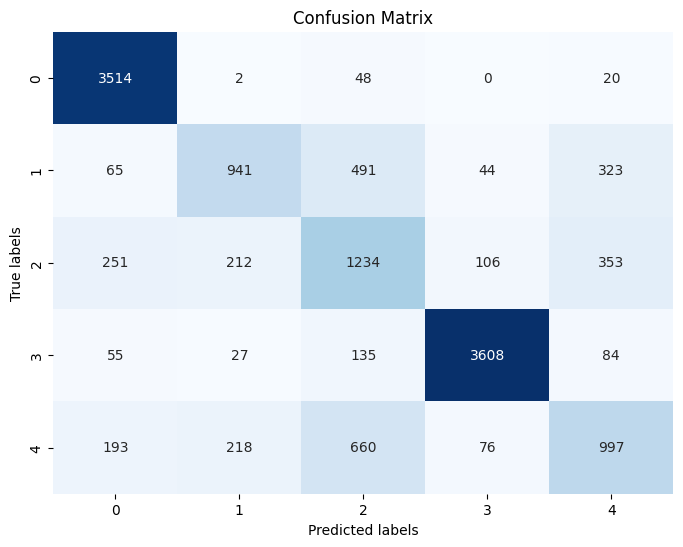

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: save the models

import pickle

# Save the Random Forest model
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

# Save the Logistic Regression model
with open('logistic_regression.pkl', 'wb') as file:
    pickle.dump(logistic_regressor, file)

# Save the XGBoost model
with open('xgboost.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)


In [ ]:
# prompt: load the models

# Load the Random Forest model
with open('/content/drive/MyDrive/random_forest.pkl', 'rb') as file:
    rf_classifier = pickle.load(file)

# Load the Logistic Regression model
with open('/content/drive/MyDrive/logistic_regression.pkl', 'rb') as file:
    logistic_regressor = pickle.load(file)

# Load the XGBoost model
with open('/content/drive/MyDrive/xgboost.pkl', 'rb') as file:
    xgb_classifier = pickle.load(file)


In [ ]:
# prompt: find unique in y_train_encoded

import numpy as np
unique_values = np.unique(y_train_encoded)
print("Unique values in y_train_encoded:", unique_values)


Unique values in y_train_encoded: [0 1 2 3 4]


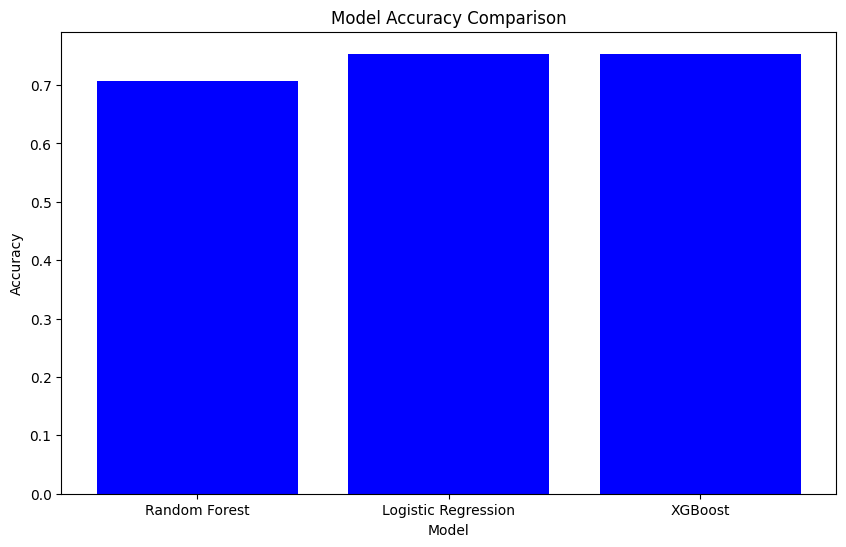

In [ ]:
# prompt: now create a graph for the accuracy for all the models

import matplotlib.pyplot as plt
# Create a list of model names
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost']

# Create a list of accuracy scores
accuracy_scores = [accuracy, accuracy_logistic, accuracy_xgb]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Show the chart
plt.show()


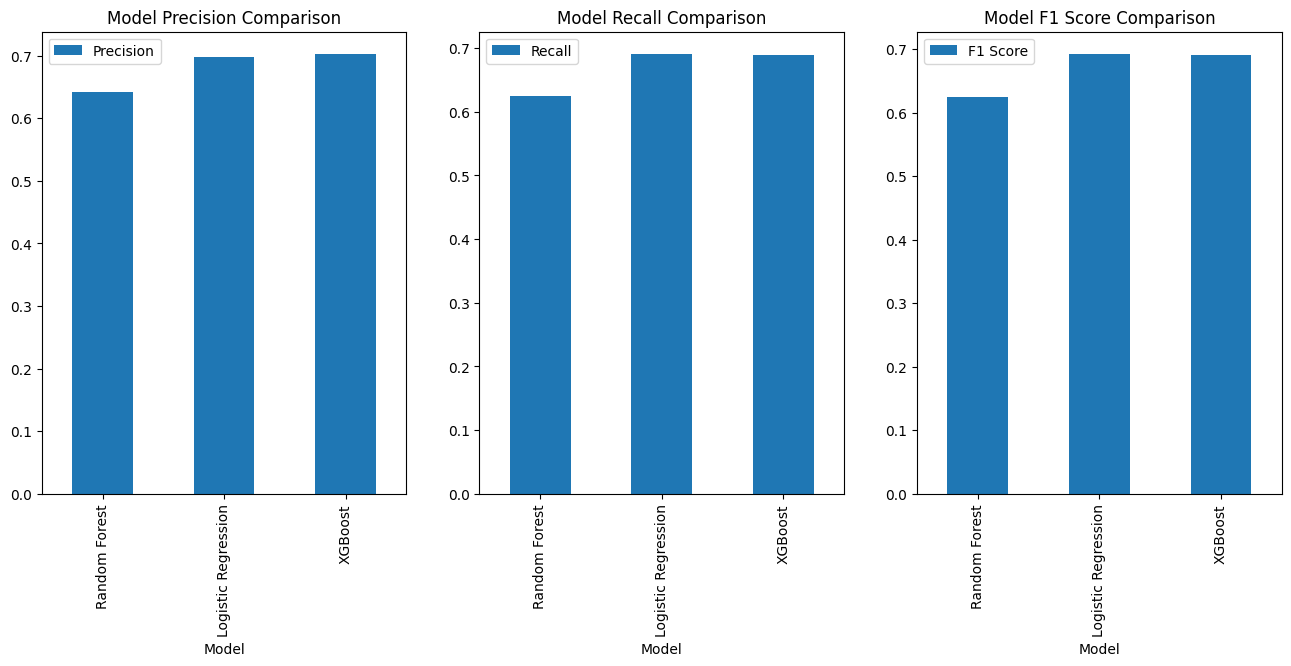

In [ ]:
# prompt: give me graph for comparing the metric of all models

import pandas as pd
import matplotlib.pyplot as plt
# Calculate precision, recall, and F1 score for each model
rf_precision, rf_recall, rf_f1 = precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')
lr_precision, lr_recall, lr_f1 = precision_score(y_test, y_pred_logistic, average='macro'), recall_score(y_test, y_pred_logistic, average='macro'), f1_score(y_test, y_pred_logistic, average='macro')
xgb_precision, xgb_recall, xgb_f1 = precision_score(y_test_encoded, y_pred_xgb, average='macro'), recall_score(y_test_encoded, y_pred_xgb, average='macro'), f1_score(y_test_encoded, y_pred_xgb, average='macro')

# Create a DataFrame with metrics for each model
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Precision': [rf_precision, lr_precision, xgb_precision],
    'Recall': [rf_recall, lr_recall, xgb_recall],
    'F1 Score': [rf_f1, lr_f1, xgb_f1]
})

# Create a bar chart for each metric
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot precision
metrics_df.plot.bar(x='Model', y='Precision', ax=axes[0])
axes[0].set_title('Model Precision Comparison')

# Plot recall
metrics_df.plot.bar(x='Model', y='Recall', ax=axes[1])
axes[1].set_title('Model Recall Comparison')

# Plot F1 score
metrics_df.plot.bar(x='Model', y='F1 Score', ax=axes[2])
axes[2].set_title('Model F1 Score Comparison')

# Show the chart
plt.show()
